<a href="https://colab.research.google.com/github/vkodedal/DeepLearning/blob/master/FashionMNIST_Sequential_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf


In [0]:
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
training_images.shape

(60000, 28, 28)

In [6]:
training_labels.shape

(60000,)

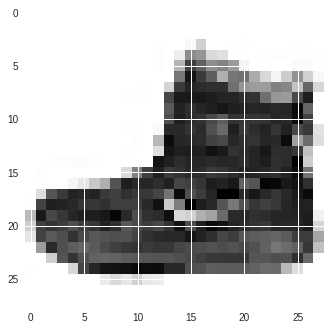

In [7]:
plt.imshow(training_images[0])

In [8]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [9]:
print(training_images[0]/255.0)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [10]:
print(training_labels[0])

9


In [0]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(512, activation=tf.nn.relu), tf.keras.layers.Dense(256, activation=tf.nn.relu), tf.keras.layers.Dense(128, activation=tf.nn.relu), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.fit(x=training_images/255.0, y=training_labels, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 24s 396us/sample - loss: 0.4770 - acc: 0.8281
Epoch 2/3
60000/60000 [==============================] - 23s 377us/sample - loss: 0.3635 - acc: 0.8677
Epoch 3/3
60000/60000 [==============================] - 22s 371us/sample - loss: 0.3281 - acc: 0.8807


In [18]:
model.evaluate(test_images/255.0, test_labels)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.3476 - acc: 0.8730


[0.34758232781887055, 0.873]

In [20]:
test_images[0].shape

(28, 28)

In [0]:
classifications = model.predict(test_images)

In [22]:
test_images.shape

(10000, 28, 28)

In [23]:
classifications[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [26]:
test_images[0].reshape(1,28,28).shape

(1, 28, 28)

In [29]:
print(model.predict(test_images[0].reshape(1,28,28)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if(logs.get('loss') < .2):
      print('Enough training. Stop now')
      self.model.stop_training = True

In [35]:
cb = mycallback()
model.fit(training_images/255.0, training_labels, epochs=10, callbacks=[cb])

Epoch 1/10
60000/60000 [==============================] - 23s 381us/sample - loss: 0.1960 - acc: 0.9251
